## 16 Selector de actividades

Buscamos resolver el siguiente problema: Tenemos una serie de actividades que deseamos realizar, pero cada actividad tiene un tiempo lpimite al que llamaremos "deadline". Cada actividad tiene un castigo en caso de no realizarla. Iniciando en el tiempo t=0, y suponiendo que todas las actividades toman tiempo t=1, buscamos encontrar el conjunto y orden de actividades a realizar tal que se minimice el castigo.

### 16.1 Algoritmo

In [5]:
def insertar (hacer, d, noHacer):
    for i in range (len(hacer)-1, 0, -1):
        if d[hacer[i]] < d[hacer[i-1]]:
            if d[hacer[i-1]] > hacer[i]:
                hacer[i], hacer[i-1] = hacer[i-1], hacer[i]
            else:
                noHacer.append(hacer[i])
                del hacer[i]
                break
        else:
            break
    return hacer

def selectorActividades (d, c, hacer, noHacer):
    for i in range (len(d)):
        maximo = 0
        for i in range (len(c)):
            if i in hacer or i in noHacer:
                continue
            if c[i] > c[maximo] or maximo in hacer or maximo in noHacer:
                maximo = i
                continue
            if c[i] == c[maximo]:
                if d[i] < d[maximo]:
                    maximo = i
        if d[maximo] > len(hacer) or d[hacer[d[maximo]-1]] > d[maximo]:
            hacer.append(maximo)
            hacer = insertar(hacer, d, noHacer)
        else:
            noHacer.append(maximo)
    # print ('Hacer: ', hacer)
    # print ('No hacer: ', noHacer)

#deadline
d = [4,2,4,3,1,4,6]
#castigos
c = [70,60,50,40,30,20,10]

hacer = []
noHacer = []
selectorActividades(d, c, hacer, noHacer)

### 16.2 Verificación

**Invariante:** Las actividades elegidas son las de mayor castigo, están en orden en que se realizarán y están a tiempo.  
**Inicilización:** La primera actividad en ser escogida es la de mayor castigo y al ser la primera en ser escogida es seguro que estará a tiempo.  
**Mantenimiento:** Cuando se analiza la actividad con el i-ésimo mayor castigo, se verifica que se pueda realizar a tiempo sin hacer que una actividad de mayor castigo quede fuera de tiempo, si no es posible, se descarta la actividad.  
**Finalización:** Finalizamos cuando para cada actividad ya se decidió si hacerla o no. 

### 16.3 Análisis del tiempo de ejecución

Notamos que la función insertar tiene tiempo de ejecución $O(n)$ ya que a lo más recorre todo el arreglo.  
Luego analizando la función selectorActividades: La línea 1 tiene tiempo de ejecución $\theta(n)$. Las líneas 2 y 4 a 11 son constantes. La línea 3 al igual que la línea 1 es $\theta(n)$. La línea 14 , que manda llamar a insertar tiene tiempo de ejecución $\theta(n)$. El resto de líneas son constantes. Como el ciclo for de la línea 1 envuenlve a todo el algoritmo, podemos decir que el tiempo de ejecución es:  
$T(n) = O(n^2)$

### 16.4 Experimentación con el tiempo de ejecución

Vamos a realizar 16 ejecuciones del algoritmo para entradas de tamaño 100*i con entradas aleatorias con $i\in\{1,\dots,16\}$. Luego tomaremos el timempo que tarda el algoritmo con cada arreglo.

100 elementos: 0.00857689999975264
200 elementos: 0.06024789999992208
300 elementos: 0.1823941000002378
400 elementos: 0.4128125999995973
500 elementos: 0.7813109999997323
600 elementos: 1.3361270999994304
700 elementos: 2.100616799999443
800 elementos: 3.090547100000549
900 elementos: 4.369278600000143
1000 elementos: 5.994652700000188
1100 elementos: 7.911693199999718
1200 elementos: 10.248132599999735
1300 elementos: 12.966901699999653
1400 elementos: 16.120690900000227
1500 elementos: 19.597400300000118
1600 elementos: 23.717426700000033


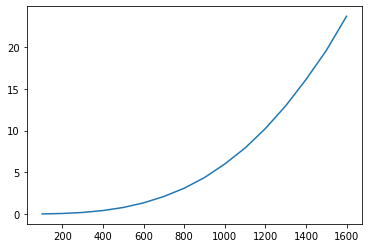

In [8]:
from timeit import default_timer
import matplotlib.pyplot as plt
import numpy as np

y=[]
x=[]
for i in range (16):
    d = np.random.randint(1,100*(i+1), size=100*(i+1))
    c = np.random.randint(1,1000*(i+1), size=100*(i+1))
    hacer = []
    noHacer = []
    inicio = default_timer()
    selectorActividades(d, c, hacer, noHacer)
    fin = default_timer()
    print(str(100*(i+1)) + ' elementos: ' + str(fin-inicio))
    x.append(100*(i+1))
    y.append(fin-inicio)

plt.plot(x, y)

Ahora ajustaremos una curva cuadrática vía mínimos cuadrados (en naranja) y la dibujaremos encima de la curva azul.

Text(0, 0.5, 'segundos')

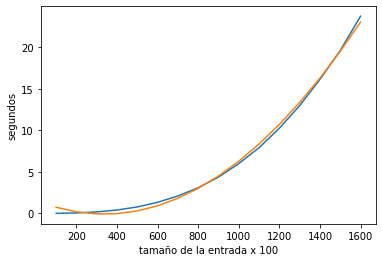

In [9]:
M = np.zeros((17,7))
suma = 0
for k in range(4):
    suma = 0
    for i in range(16):
        M[i,k] = x[i]**(k+1)
        suma += M[i,k]
    M[16,k] = suma

for k in range(3):
    suma = 0
    for i in range(16):
        M[i,4+k] = y[i]*(x[i]**k)
        suma += M[i,4+k]
    M[16,4+k] = suma

MatrizDeCoeficientes = np.zeros((3,3))
for i in range (3):
    for j in range (3):
        if i+j>0:
            MatrizDeCoeficientes[i,j] = M[16,i+j-1]
        else:
            MatrizDeCoeficientes[i,j] = 16

MatrizDeResultados = np.zeros((3,1))
for i in range(3):
    MatrizDeResultados[i,0]=M[16,4+i]

#Multiplicar la inversa de lamatriz de coeficientes por la matriz de resultados
coeficientes = np.dot(np.linalg.inv(MatrizDeCoeficientes), MatrizDeResultados)

def f(x):
    return coeficientes[0] + coeficientes[1]*x + coeficientes[2]*x*x
plt.plot(x, y)
plt.plot(x, f(x))
plt.xlabel('tamaño de la entrada x 100')
plt.ylabel('segundos')